<a href="https://colab.research.google.com/github/kannandreams/AI-CodeBook/blob/master/mpneuron/cancer_prediction_using_mpm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://en.wikipedia.org/wiki/Artificial_neuron

![alt text](https://upload.wikimedia.org/wikipedia/commons/b/b0/Artificial_neuron.png)

### Learning from Guvi - Deep Learning course

In [0]:
import sklearn.datasets
import numpy as np

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()

X = breast_cancer.data
Y = breast_cancer.target

In [138]:
print(X.shape,Y.shape)

(569, 30) (569,)


In [0]:
import pandas as pd

data = pd.DataFrame(data = breast_cancer.data , columns=breast_cancer.feature_names)
data['class'] = breast_cancer.target

In [140]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [141]:
print(data['class'].value_counts())
breast_cancer.target_names

1    357
0    212
Name: class, dtype: int64


array(['malignant', 'benign'], dtype='<U9')

In [142]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


### Train test split

In [0]:
from sklearn.model_selection import train_test_split

X = data.drop('class',axis=1)
Y = data['class']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.1)

In [144]:
print(Y.mean(),Y_train.mean(),Y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


In [123]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.1,stratify=Y,random_state=1)
print(Y.mean(),Y_train.mean(),Y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


### Binarisation

In [0]:
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

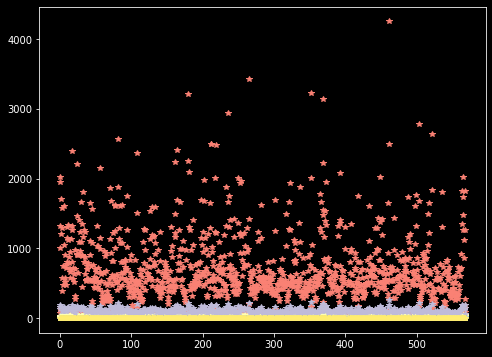

In [20]:
fig = plt.figure(figsize=(8,6))
plt.plot(X_train,'*')
plt.show()

In [22]:
X_train.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
430,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,0.2530,0.8749,3.466,24.19,0.006965,0.06213,0.07926,0.02234,0.01499,0.005784,16.35,27.57,125.40,832.7,0.1419,0.7090,0.9019,0.24750,0.2866,0.11550
48,12.05,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.02749,0.1675,0.06043,0.2636,0.7294,1.848,19.87,0.005488,0.01427,0.02322,0.00566,0.01428,0.002422,13.76,20.70,89.88,582.6,0.1494,0.2156,0.3050,0.06548,0.2747,0.08301
105,13.11,15.56,87.21,530.2,0.13980,0.17650,0.20710,0.09601,0.1925,0.07692,0.3908,0.9238,2.410,34.66,0.007162,0.02912,0.05473,0.01388,0.01547,0.007098,16.31,22.40,106.40,827.2,0.1862,0.4099,0.6376,0.19860,0.3147,0.14050


In [23]:
X_train.T.head(3)

,430,48,105,467,547,365,295,567,297,172,506,488,115,466,218,74,461,484,79,226,37,44,324,13,277,134,83,153,327,68,392,61,0,435,70,438,284,305,71,524,...,112,10,560,26,177,8,548,268,34,123,486,207,357,409,211,289,11,53,86,266,398,77,125,537,532,472,259,227,476,453,33,65,188,479,509,201,183,285,49,161
mean radius,14.90,12.05,13.11,9.668,10.26,20.44,13.77,20.60,11.76,15.46,12.22,11.68,11.93,13.14,19.80,12.31,27.42,15.73,12.86,10.44,13.03,13.17,12.20,15.85,18.81,18.45,19.10,11.15,12.03,9.029,15.49,8.598,17.99,13.98,18.94,13.85,12.89,11.60,8.888,9.847,...,14.26,16.02,14.05,14.58,16.46,13.00,9.683,12.87,16.13,14.50,14.64,17.01,13.87,12.27,11.84,11.37,15.78,18.22,14.48,10.60,11.06,18.05,13.85,11.69,13.68,14.92,15.53,15.00,14.20,14.53,19.27,14.78,11.81,16.25,15.46,17.54,11.41,12.58,13.49,19.19
mean texture,22.53,14.63,15.56,18.100,16.58,21.78,13.27,29.33,18.14,11.89,20.04,16.17,21.53,20.74,21.56,16.52,26.27,11.28,18.00,15.46,18.42,21.81,15.21,23.95,19.98,21.91,26.29,13.08,17.93,17.330,19.97,20.980,10.38,19.62,21.31,19.60,15.70,24.49,14.640,15.680,...,19.65,23.24,27.15,21.53,20.11,21.82,19.340,16.21,17.88,10.89,16.85,20.26,16.21,17.92,18.94,18.89,17.89,18.70,21.46,18.95,14.83,16.15,17.21,24.44,16.33,14.93,33.56,15.51,20.53,13.98,26.47,23.94,17.39,19.51,23.95,19.32,14.92,18.40,22.30,15.94
mean perimeter,102.10,78.04,87.21,61.060,65.85,133.80,88.06,140.10,75.00,102.50,79.47,75.49,76.53,85.98,129.70,79.19,186.90,102.80,83.19,66.62,82.61,85.42,78.01,103.70,120.90,120.20,129.10,70.87,76.09,58.790,102.40,54.660,122.80,91.12,123.60,88.68,84.08,74.23,58.790,63.000,...,97.83,102.70,91.38,97.41,109.30,87.50,61.050,82.38,107.00,94.28,94.21,109.70,88.52,78.41,75.51,72.17,103.60,120.30,94.25,69.28,70.31,120.20,88.44,76.37,87.76,96.45,103.70,97.45,92.41,93.86,127.90,97.40,75.27,109.80,103.80,115.10,73.53,79.83,86.91,126.30


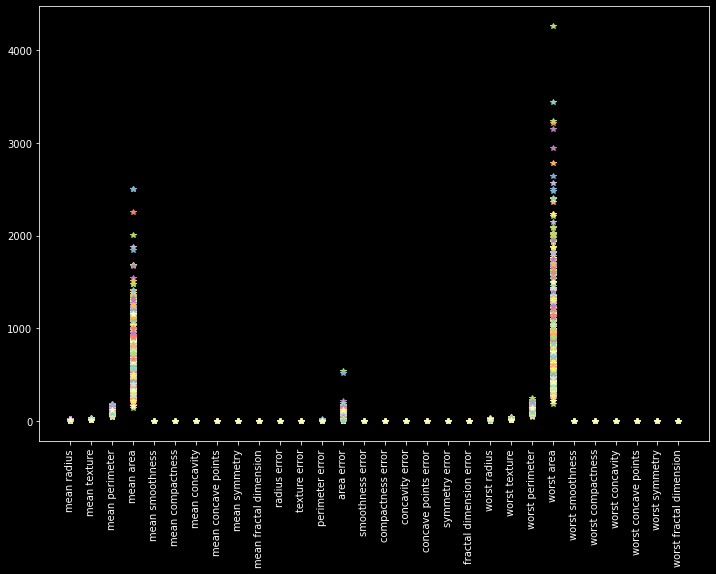

In [27]:
fig = plt.figure(figsize=(12,8))
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_binarized_train = X_train.apply(pd.cut,bins=2,labels=[0,1])

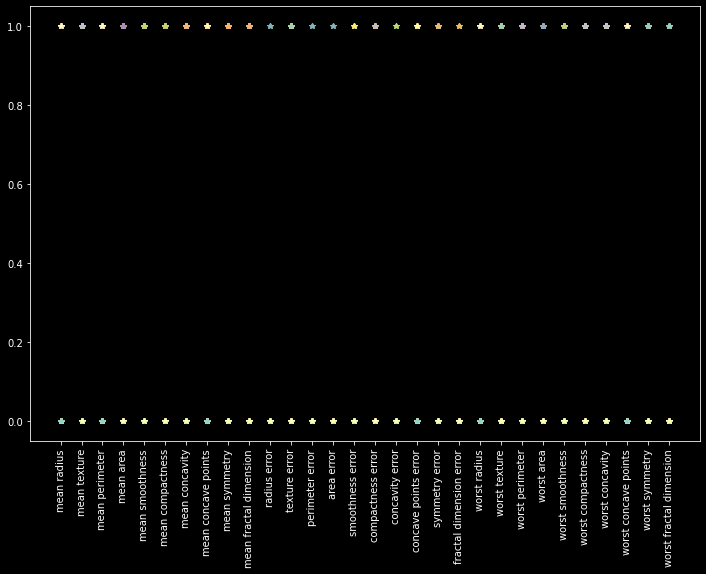

In [29]:
fig = plt.figure(figsize=(12,8))
plt.plot(X_binarized_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_binarized_test = X_test.apply(pd.cut,bins=2,labels=[0,1])

In [0]:
X_binarized_train = X_binarized_train.values
X_binarized_test = X_binarized_test.values

### MP Neuron Model

In [46]:
from random import randint

b = 3
i = randint(0,X_binarized_train.shape[0])

print("For row",i)

if (np.sum(X_binarized_train[i:])> b):
  print("MP Neuron inference is malignant")
else:
  print("MP Neuron inference is benign")

if(Y_train[i] == 1):
  print("Ground truth is malignant")
else:
  print("Ground truth is benign")


For row 497
MP Neuron inference is malignant
Ground truth is malignant


In [51]:
b = 3
Y_pred_train =[]
accurate_rows = 0
for x,y in zip(X_binarized_train,Y_train):
  y_pred = (np.sum(x) >=b)
  Y_pred_train.append(y_pred)
  accurate_rows += (y_pred == y)

print(accurate_rows,accurate_rows /X_binarized_train.shape[0] )

77 0.150390625


In [55]:
for b in range(X_binarized_train.shape[1] + 1):
  Y_pred_train =[]
  accurate_rows = 0
  for x,y in zip(X_binarized_train,Y_train):
    y_pred = (np.sum(x) >=b)
    Y_pred_train.append(y_pred)
    accurate_rows += (y_pred == y)

  print(b,accurate_rows,accurate_rows /X_binarized_train.shape[0] )

0 321 0.626953125
1 123 0.240234375
2 95 0.185546875
3 77 0.150390625
4 79 0.154296875
5 93 0.181640625
6 110 0.21484375
7 125 0.244140625
8 141 0.275390625
9 153 0.298828125
10 160 0.3125
11 168 0.328125
12 172 0.3359375
13 176 0.34375
14 180 0.3515625
15 183 0.357421875
16 188 0.3671875
17 189 0.369140625
18 191 0.373046875
19 191 0.373046875
20 191 0.373046875
21 191 0.373046875
22 191 0.373046875
23 191 0.373046875
24 191 0.373046875
25 191 0.373046875
26 191 0.373046875
27 191 0.373046875
28 191 0.373046875
29 191 0.373046875
30 191 0.373046875


### As part of binarization ,we splitted the data into two bins as 0,1.

For example : radius mean is lower for 1 and higher for 0. But what we did is assigned 1 for higher range and 0 for lower range during binarization techniques. 

We can swap the binarization labels but it might not applied to all the features we have. But we can try that 


In [56]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


### Reruning binarization

In [58]:
X_binarized_train = X_train.apply(pd.cut,bins=2,labels=[1,0])
X_binarized_test = X_test.apply(pd.cut,bins=2,labels=[1,0])
X_binarized_train = X_binarized_train.values
X_binarized_test = X_binarized_test.values
for b in range(X_binarized_train.shape[1] + 1):
  Y_pred_train =[]
  accurate_rows = 0
  for x,y in zip(X_binarized_train,Y_train):
    y_pred = (np.sum(x) >=b)
    Y_pred_train.append(y_pred)
    accurate_rows += (y_pred == y)

  print(b,accurate_rows,accurate_rows /X_binarized_train.shape[0] )

0 321 0.626953125
1 321 0.626953125
2 321 0.626953125
3 321 0.626953125
4 321 0.626953125
5 321 0.626953125
6 321 0.626953125
7 321 0.626953125
8 321 0.626953125
9 321 0.626953125
10 321 0.626953125
11 321 0.626953125
12 321 0.626953125
13 321 0.626953125
14 323 0.630859375
15 324 0.6328125
16 329 0.642578125
17 332 0.6484375
18 336 0.65625
19 340 0.6640625
20 344 0.671875
21 352 0.6875
22 359 0.701171875
23 371 0.724609375
24 387 0.755859375
25 402 0.78515625
26 419 0.818359375
27 433 0.845703125
28 435 0.849609375
29 417 0.814453125
30 389 0.759765625


You could noticed here that when b=28 , the accuracy is higher 

In [0]:
from sklearn.metrics import accuracy_score

In [63]:
b = 28
Y_pred_test =[]
for x in X_binarized_test:
  y_pred = (np.sum(x) >=b)
  Y_pred_test.append(y_pred)

accuracy = accuracy_score(Y_pred_test,Y_test)

print(b,accuracy)

28 0.7894736842105263


# **MP Neuron Class**

In [0]:
class MPNeuron:
  def __init__(self):
    self.b = None
  
  def model(self,X):
    return (sum(X) > self.b)
  
  def predict(self,X):
    Y=[]
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self,X,Y):
    accuracy = {}
    for b in range(X.shape[1] + 1):
      self.b=b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred,Y)
    best_b = max(accuracy,key = accuracy.get)
    self.b = best_b

    print("Optimal value of b is",best_b)
    print("Highest accuracy is ",accuracy[best_b])



In [65]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarized_train,Y_train)

Optimal value of b is 27
Highest accuracy is  0.849609375


In [67]:
Y_test_pred = mp_neuron.predict(X_binarized_test)
accuracy_test = accuracy_score(Y_test_pred,Y_test)
print(accuracy_test)

0.7894736842105263


# **Perceptron Class**


In [0]:
import pandas as pd

breast_cancer = sklearn.datasets.load_breast_cancer()

X = breast_cancer.data
Y = breast_cancer.target


data = pd.DataFrame(data = breast_cancer.data , columns=breast_cancer.feature_names)
data['class'] = breast_cancer.target

from sklearn.model_selection import train_test_split

X = data.drop('class',axis=1)
Y = data['class']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.1,stratify=Y,random_state=1)

X_train = X_train.values
X_test = X_test.values

In [0]:
class Perceptron:
  def __init__(self):
    self.w = None
    self.b = None

  def model(self,x):
    return 1 if (np.dot(self.w,x) >= self.b) else 0

  def predict(self,X):
    Y=[]
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y,epochs = 1,lr = 1):
    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    max_accuracy=0

    wt_matrix=[]

    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b + lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b - lr * 1

      wt_matrix.append(self.w)

      accuracy[i] = accuracy_score(self.predict(X),Y)
      if(accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b

      self.w = chkptw
      self.b = chkptb

    print("Max Accuracy",max_accuracy)
    plt.plot(list(accuracy.values()))
    plt.ylim(0,1)
    plt.show()

    return np.array(wt_matrix)
    

Max Accuracy 0.869140625


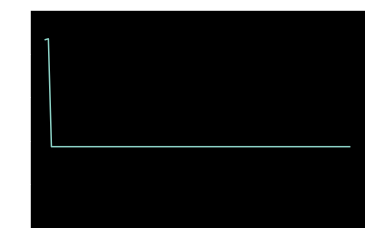

In [261]:
perceptron = Perceptron()
wt_matrix = perceptron.fit(X_train,Y_train,100,0.001)

In [262]:
from sklearn.metrics import accuracy_score
Y_pred_train = perceptron.predict(X_train)
print(accuracy_score(Y_pred_train,Y_train))

0.869140625


In [263]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test,Y_test))

0.8596491228070176


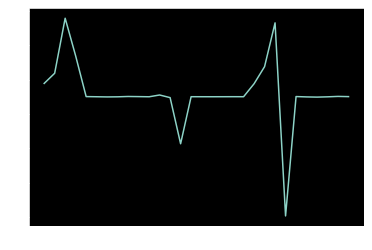

In [266]:
plt.plot(wt_matrix[-1,:])
plt.show()

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1743, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1766, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
TypeError: animate() takes 0 positional arguments but 1 was given


TypeError: ignored

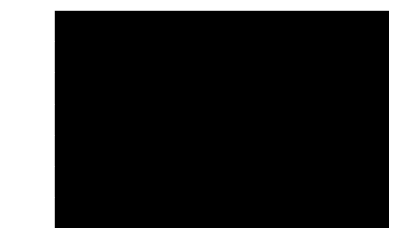

In [267]:
%matplotlib inline

from matplotlib import animation,rc
from IPython.display import HTML

fig,ax=plt.subplots()
ax.set_xlim((0,wt_matrix.shape[1]))
ax.set_ylim((-10000,25000))

line, = ax.plot([],[],lw=2)


def animate():
  x = list(range(wt_matrix.shape[1]))
  y = wt_matrix[i,:]
  line.set_data(x,y)
  return (line,)

anim = animation.FuncAnimation(fig,animate,frames=100,interval=20,blit=True)

HTML(anim.to_html5_video())